Liam Brown  
lpb7  
3/1/23

## Part 1 ##

**Import the appropriate packages (numpy, pandas, matplotlib, seaborn)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Import the training data into a data frame, and the test data into a separate data frame.**

In [2]:
dftrain = pd.read_csv('genes_train.csv')
dftest = pd.read_csv('genes_test.csv')

**What is the shape of the training data? Is it unbalanced?**

In [3]:
dftrain.shape

(40, 7131)

In [4]:
dftrain.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,ALL
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,ALL
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,ALL
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,ALL


> There are 40 rows and 7,131 columns. There are 40 patients in the training data and 7,129 genes being analyzed. The data is unbalanced and the model may experience overfitting. 

**What is the number of patients with ALL and AML in the training data? Is this output data 
balanced or unbalanced? Why?**

In [5]:
dftrain['cancer type'].value_counts()

ALL    29
AML    11
Name: cancer type, dtype: int64

>There are 29 patients with ALL and 11 patients with AML. The output data is at about a 25% to 75% split so it is unbalanced. There are more ALL training patients available to the model than AML. 

**Find the maximum, minimum, and mean of the first few rows of the training data. If  the  maximum,  minimum,  and mean for a given patient are very far apart, it is likely that the data are not on the same scale. Is that the case here? Is this a problem? Why or why not? Based on your answers above, do we need to scale the data?**

In [6]:
dftrain.max(numeric_only=True,axis=1)

0     31086
1     29288
2     28056
3     31449
4     29543
5     38467
6     41911
7     40065
8     23602
9     28033
10    25966
11    30546
12    30797
13    28519
14    30256
15    27268
16    28952
17    32645
18    33143
19    27358
20    33548
21    39558
22    36417
23    27983
24    32785
25    31614
26    31261
27    29833
28    30354
29    25055
30    28350
31    25093
32    32946
33    28698
34    61228
35    37164
36    32204
37    29169
38    45815
39    29136
dtype: int64

In [7]:
dftrain.min(numeric_only=True,axis=1)

0    -19826
1    -17930
2    -27182
3    -23396
4    -10339
5    -21658
6    -24024
7    -27570
8    -25171
9    -12500
10   -17480
11   -15256
12   -12854
13   -14937
14   -13380
15   -10492
16   -19523
17    -8692
18   -11572
19   -13838
20    -7397
21   -17179
22   -14937
23   -17368
24   -17377
25   -10652
26   -20406
27   -20376
28    -9501
29   -17580
30   -25491
31   -28400
32   -27811
33   -17310
34   -16281
35   -27398
36   -23673
37   -23645
38   -21984
39   -21296
dtype: int64

In [8]:
dftrain.mean(numeric_only=True,axis=1)

0     641.277279
1     690.149790
2     698.210379
3     600.901543
4     679.438289
5     564.719355
6     584.356662
7     571.280084
8     789.604208
9     599.400421
10    632.166760
11    492.532819
12    674.563815
13    648.522581
14    705.682188
15    624.492847
16    791.292987
17    557.489902
18    558.555820
19    954.292006
20    577.572230
21    524.687798
22    532.180926
23    662.077279
24    597.783450
25    603.232398
26    501.277279
27    673.188920
28    556.389201
29    718.837868
30    598.569285
31    676.830435
32    723.466620
33    618.776578
34    514.429453
35    775.039832
36    689.156662
37    626.803366
38    582.118794
39    527.750912
dtype: float64

> Maximum, minimum, and mean are very far apart in this case so the data is not on the same scale. This is a problem because the model will value greater values more significantly than the smaller values. Because of this, we do need to scale the data. 

**Next, make x_train, y_train, x_test, and y_test manually from the training and test data frames.**

In [9]:
x_train = dftrain.drop(["patient",'cancer type'],axis=1)
y_train = dftrain['cancer type']
x_test = dftest.drop(["patient",'cancer type'],axis=1)
y_test = dftest['cancer type']

**What columns will you drop for your x data (there should be two) and what should your y output 
be?**

> For the x data, I dropped patient number and cancer type as the patient number does not impact the output and the cancer type is the y output. 

**First, scale the x_train and x_test data separately using a Standard scaler.**

In [10]:
from sklearn.preprocessing import StandardScaler

x_train_stdscaled = StandardScaler().fit_transform(x_train)
x_test_stdscaled = StandardScaler().fit_transform(x_test)

**Build a logistic regression model using this scaled x_training data and make predictions using 
the scaled x_test data.**

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train_stdscaled, y_train)

y_pred = model.predict(x_test_stdscaled)

**What is the score of your model on the training data? What is the accuracy? What is the confusion 
matrix?**

In [12]:
from sklearn import metrics

print('Model Training Score: ', model.score(x_train_stdscaled,y_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[18  0]
 [ 8  6]]
Accuracy:  0.75


> The model has a training score of 100% so it is 100% accurate at predicting the outputs of the training data. The Accuracy for the test data is 75% and since there are 32 patients in the test data, that means that 8 of the patients were predicted incorrectly. The confusion matrix shows that 8 of the AML cases were predicted to be ALL. No ALL cases were predicted to be AML.  

**Build a Gaussian Naïve Bayes classification model using this scaled x_training data and make predictions using the scaled x_test data. What is the score of your model on the training data? What is the accuracy? What is the confusion matrix?**

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train_stdscaled,y_train)

y_pred = model.predict(x_test_stdscaled)
print('Model Training Score: ', model.score(x_train_stdscaled,y_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[18  0]
 [ 7  7]]
Accuracy:  0.78125


> The model had a score of 100% on the training data. The accuracy is 78% and the confusion matrix says that no instances were incorrectly marked as AML, but 7 instances of AML were predicted as ALL. 

**Why are these scores so low?**

> One of the reasons that the accuracy is lower than the training score is that the training data is overfit. Another possibility is that the scaling is different enough that the model is no longer an accurate predictor for the output. Since the test data is scaled separately it is likely inconsistent with the training data. Both confusion matricies have similar results where AML patients are falsely predicted to be ALL.

**Scale the training data by hand in the same way the standard scaler does using Pandas (subtract 
the mean and divide by the standard deviation).**

In [14]:
dftrain_scaled = (dftrain - dftrain.mean(numeric_only=True)) / dftrain.std(numeric_only=True)
dftrain_scaled.head()

,(AF1q) mRNA,(HepG2) glucose transporter gene mRNA,(apoargC) long mRNA,(ard-1) mRNA,(chromosome 3p25) membrane protein mRNA,(clone 14VS) metallothionein-IG (MT1G) gene,(clone 35.3) DRAL mRNA,(clone 8B1) Br-cadherin mRNA,(clone CC6) NADH-ubiquinone oxidoreductase subunit mRNA; 3' end cds,(clone CTG-A4) mRNA sequence,...,mRNA homologous to S. cerevisiae RAD54,mRNA in the region near the btk gene involved in a-gamma-globulinemia,mRNA translocon-associated protein delta subunit precursor,mRNA-associated protein mrnp41 mRNA,mRNA; clone HH109 (screened by the monoclonal antibody of insulin receptor substrate-1 (IRS-1)),mRNA; clone RES4-22A,mRNA; clone RES4-24A; exon 1; 2; 3; 4,mRNA; clone RES4-24C; exon 1; 2; 3,mRNA; clone RES4-25; partial cds,patient
0,0.125174,-0.491406,-0.537793,0.057981,0.190287,0.576353,0.832240,-0.357679,-0.565462,-0.496470,...,0.719026,2.752606,1.241641,0.500890,2.270333,-0.547419,-0.136957,0.106269,0.179568,-1.668028
1,-0.108707,-0.692001,-0.400173,-0.201813,0.743098,-0.204552,-0.481477,-0.225748,-0.191218,0.892905,...,0.319409,0.719671,0.610685,-1.074001,0.025869,0.272235,-0.248904,0.305334,-0.035977,-1.582488
2,2.016905,-0.370213,-0.942051,0.029640,0.433689,0.506718,-2.031664,-2.190053,0.739333,0.022230,...,-0.017412,1.691059,-0.809958,-0.179389,0.494331,0.177022,3.938397,-1.886806,0.271492,-1.496948
3,-0.466688,-0.021261,-0.245350,0.818471,-0.403779,-0.721840,0.832240,0.448565,-0.856764,-0.403845,...,-0.445574,-0.112117,-0.700169,0.500890,0.722631,0.448170,1.496996,-0.075802,-0.698461,-1.411408
4,0.016984,-0.297079,1.578113,0.327223,-0.742067,1.794962,-0.284420,0.800381,0.166842,-0.274170,...,0.798950,-0.336060,-0.144611,-0.076881,-0.152028,-0.628142,-1.282629,1.198697,1.377744,-1.325868


In [15]:
dftrain_scaled.drop('patient',axis=1,inplace=True)

In [16]:
dftrain_scaled['cancer type']=dftrain['cancer type']

**Scale the test data by hand the exact same way. (Using the mean and standard deviation of the 
training data).**

In [17]:
dftest_scaled = (dftest - dftrain.mean(numeric_only=True)) / dftrain.std(numeric_only=True)
dftest_scaled.head()

,(AF1q) mRNA,(HepG2) glucose transporter gene mRNA,(apoargC) long mRNA,(ard-1) mRNA,(chromosome 3p25) membrane protein mRNA,(clone 14VS) metallothionein-IG (MT1G) gene,(clone 35.3) DRAL mRNA,(clone 8B1) Br-cadherin mRNA,(clone CC6) NADH-ubiquinone oxidoreductase subunit mRNA; 3' end cds,(clone CTG-A4) mRNA sequence,...,mRNA homologous to S. cerevisiae RAD54,mRNA in the region near the btk gene involved in a-gamma-globulinemia,mRNA translocon-associated protein delta subunit precursor,mRNA-associated protein mrnp41 mRNA,mRNA; clone HH109 (screened by the monoclonal antibody of insulin receptor substrate-1 (IRS-1)),mRNA; clone RES4-22A,mRNA; clone RES4-24A; exon 1; 2; 3; 4,mRNA; clone RES4-24C; exon 1; 2; 3,mRNA; clone RES4-25; partial cds,patient
0,-0.231216,-0.583345,1.517904,-0.197090,0.903991,0.377396,0.030872,1.269469,0.868801,-0.181545,...,0.918835,-0.932271,-0.436940,0.631354,0.504708,1.317499,-1.618471,1.494867,-0.292729,1.753568
1,-0.347361,3.219603,0.477154,-0.669444,-0.585299,-0.159787,1.475962,1.298786,0.409594,-0.274170,...,1.261364,-0.344785,0.852750,-0.906261,0.151879,-1.716873,-0.787203,-0.833219,-0.045486,1.839108
2,-0.452369,1.255443,0.614774,-0.069554,0.351180,-0.249318,-0.231871,0.829699,-0.516911,0.818805,...,-2.066879,-1.365615,-0.282178,-0.505549,-0.266178,-2.126700,-0.968224,-0.126782,-1.351435,1.924648
3,0.834772,-0.909312,1.070639,-0.858385,1.184522,1.327414,-1.020102,1.108220,0.971971,-1.459770,...,-0.474118,-0.147017,-0.721334,-0.449636,1.158478,-1.621661,-1.249283,1.320078,0.477527,2.010187
4,-0.317131,-0.971998,0.348135,-0.981197,0.536825,-0.294083,-0.271283,3.087183,0.338791,0.596505,...,-0.354232,-0.397135,0.536610,-1.083320,-0.423320,-0.636421,-1.137336,1.414755,-0.581179,2.095727


In [18]:
dftest_scaled.drop('patient',axis=1,inplace=True)

In [19]:
dftest_scaled['cancer type']=dftest['cancer type']

**Retrain both a logistic regression and Naïve Bayes model using this new scaled data. Does this 
improve the performance? Why?**

In [20]:
x_train_manscaled = dftrain_scaled.drop('cancer type',axis=1)
x_test_manscaled = dftest_scaled.drop('cancer type',axis=1)

In [21]:
model = LogisticRegression()

model.fit(x_train_manscaled, y_train)

y_pred = model.predict(x_test_manscaled)

print('Model Training Score: ', model.score(x_train_manscaled,y_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[18  0]
 [ 6  8]]
Accuracy:  0.8125


In [22]:
model = GaussianNB()

model.fit(x_train_manscaled,y_train)

y_pred = model.predict(x_test_manscaled)
print('Model Training Score: ', model.score(x_train_manscaled,y_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[16  2]
 [ 1 13]]
Accuracy:  0.90625


> Both models had an improved performance when the scaling was consistent throughout the dataset. The model is fitted to the scaled values in the training data, so using the same scaling values allows the model to predict more accurately. 

## Part 2 ##

**Using only the training data, increase the value of n_components a few at a time and monitor 
the total sum of the explained variance (pca.explained_variance_ratio_.cumsum()).**

In [23]:
from sklearn.decomposition import PCA
k = 0
val = 0.0
while val < 0.9:
    k += 1
    pca = PCA(n_components = k).fit(x_train_manscaled)
    val = pca.explained_variance_ratio_.cumsum()[k-1]
print(k)
pca = PCA(n_components = k).fit(x_train_manscaled)
print(pca.explained_variance_ratio_.cumsum())

30
[0.14160178 0.25887229 0.32470765 0.37114269 0.41593652 0.45377108
 0.49028899 0.52256446 0.55262452 0.57871474 0.60331123 0.62601503
 0.64798886 0.66892235 0.68894065 0.70786795 0.72580368 0.74303738
 0.75991715 0.77579443 0.79135625 0.80636007 0.82059574 0.83464022
 0.84827473 0.86159723 0.87466785 0.88744908 0.89998391 0.91215863]


**How many principal components do you need to explain 90% of the variance?**

> 30 principal components are necessary to explain 90% of the variance. 

**Once you determine that, create a new x array and set it equal to “pca.transform()” calling your 
previously scaled x training data. Do the same for the previously scaled x test data.**

In [24]:
x_train_manscaled_pca = pca.transform(x_train_manscaled)
x_test_manscaled_pca = pca.transform(x_test_manscaled)

**Determine the classification matrices and accuracies. How did they change from the models in 
Part 1? Do you think these models are more generalizable to new patients? Why or why not?**

In [25]:
model = LogisticRegression()

model.fit(x_train_manscaled_pca, y_train)

y_pred = model.predict(x_test_manscaled_pca)

print('Model Training Score: ', model.score(x_train_manscaled_pca,y_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[18  0]
 [ 7  7]]
Accuracy:  0.78125


In [26]:
model = GaussianNB()

model.fit(x_train_manscaled_pca,y_train)

y_pred = model.predict(x_test_manscaled_pca)
print('Model Training Score: ', model.score(x_train_manscaled_pca,y_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Training Score:  0.975
Confusion matrix: 
 [[18  0]
 [10  4]]
Accuracy:  0.6875


> The accuracies decreased from part 1. The models are less generalizable to new patients than the original models found in part 1 as they are less accurate predictors of the patient's classification. 

**Was PCA appropriate to perform here? Why do you think it changed the accuracy the way it did?**

> I would have thought that PCA is appropriate to use in this situation as the model scores were consistently higher than the test scores which could mean overfitting is present. PCA would likely reduce overfitting. However this is not the case in this instance as the model training scores are still very high compared to the test accuracy of the model. The model accuracy likely decreased because information was lost when the least strong predictors were dropped. 

## Part 3 ##

In [27]:
from imblearn.over_sampling import SMOTE

**As with PCA, create a new “smote” variable and assign it the “SMOTE()” object. Create new x and y arrays by setting it equal to “smote.fit_resample()” passing the scaled x data and the old y data. (For both the training and test data).**

In [28]:
smote = SMOTE()

x_bal_train, y_bal_train = smote.fit_resample(x_train_manscaled,y_train)
x_bal_test, y_bal_test = smote.fit_resample(x_test_manscaled,y_test)

**What is the distribution of the outputs in the new y array?**

<AxesSubplot:xlabel='cancer type', ylabel='count'>

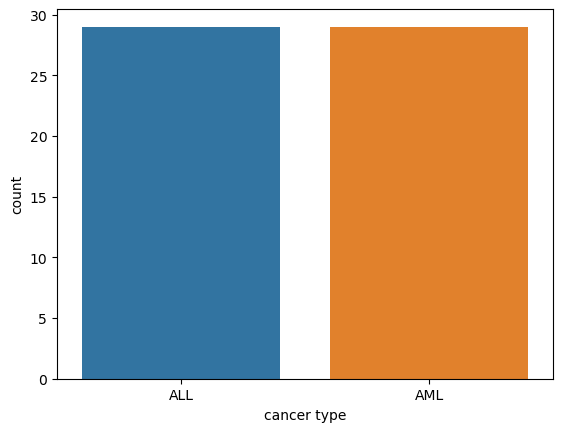

In [29]:
sns.countplot(x=y_bal_train)

<AxesSubplot:xlabel='cancer type', ylabel='count'>

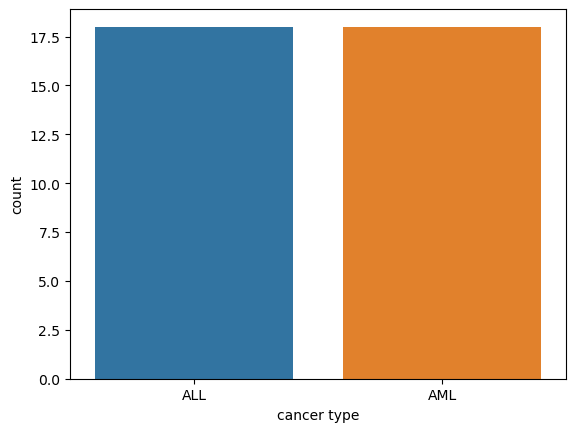

In [30]:
sns.countplot(x=y_bal_test)

**Feed this data into a new logistic regression model and a new Naïve Bayes model. Determine 
the classification matrices and accuracies. How did they change from the models in Part 1?**

In [31]:
model = LogisticRegression()

model.fit(x_bal_train, y_bal_train)

y_pred = model.predict(x_bal_test)

print('Model Training Score: ', model.score(x_bal_train, y_bal_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_bal_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_bal_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[18  0]
 [ 7 11]]
Accuracy:  0.8055555555555556


In [32]:
model = GaussianNB()

model.fit(x_bal_train, y_bal_train)

y_pred = model.predict(x_bal_test)

print('Model Training Score: ', model.score(x_bal_train, y_bal_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_bal_test, y_pred, labels=['ALL','AML']))
print("Accuracy: ", metrics.accuracy_score(y_bal_test, y_pred))

Model Training Score:  1.0
Confusion matrix: 
 [[16  2]
 [ 2 16]]
Accuracy:  0.8888888888888888


> The confusion matrix now has 36 values in it and the total amount of AML and ALL cases are the same. The Naive Bayes model incorrectly predicted both AML and ALL cases while the logistic regression model only incorrectly predicted the AML cases. The accuracies were the highest of all models created with the exception of the model without PCA and SMOTE and with manual scaling. 

## Part 4 ##

> If I were to build a model from this data that was generalizable to new patients, I would scale the data using StandardScaler or manually scale it by subtracting the mean and then dividing that by the variance. I would use the same scaler for the training and test set data rather than creating a new scaler for each set. Using different scalers resulted in the model accuracy being lower than it was when using the same scaler. I would not use PCA or SMOTE as they both yielded models with lower accuracies. These were the circumstances that I found to produce the most accurate model. 